In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

# normed-contrast

In [ ]:
#读取计算范数之后的数据，norm文件
def read_norm(dir):
    with np.load(dir+'/output_norm.npz') as f:
        fr_norm=f['fr_norm']
        error_norm=f['error_norm']
    return fr_norm,error_norm

In [138]:
error=[]
y2=[]
for i in range(10):
    dir='/home/zhaobenyan/dataset/output/grating_32x32/contrast{}'.format(i+1)
    fr_norm,error_norm=read_norm(dir)
    error.append(error_norm)
    y2.append(fr_norm[0])
error=np.array(error).T
print(error)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.09190715 0.07535262 0.06920501 0.06186849]
 [0.         0.         0.         0.         0.         0.
  0.08964734 0.07397631 0.06802292 0.0613286 ]
 [0.         0.         0.         0.         0.         0.
  0.07733319 0.07711189 0.06678012 0.05975149]
 [0.         0.         0.         0.         0.         0.06427837
  0.08996981 0.07488891 0.06808154 0.0591923 ]
 [0.         0.         0.         0.         0.         0.
  0.08624454 0.07567553 0.06737479 0.06039438]
 [0.         0.         0.         0.         0.         0.
  0.08826368 0.07477253 0.06802292 0.06274659]
 [0.         0.         0.         0.         0.         0.
  0.0887273  0.07528325 0.06792512 0.05982327]
 [0.         0.         0.         0.         0.         0.06427837
  0.08548565 0.07348022 0.06843218 0.05809469]
 [0.         0.      

In [147]:
def plot_contrast(error,y2):
    x=np.arange(0.05,0.55,0.05)
    plt.figure(figsize=(6, 6))
    ax1 = plt.subplot(111)
    for i in range(10):
        plt.scatter(x, error[i],color='g')#label=' ')#label="{}".format(i))
        #ax1.legend(loc=i)
        if i==1:
                for a, b in zip(x, np.around(error[i],4)):  # 添加这个循坏显示坐标
                    plt.text(a, b, b, color = "b",ha='center', va='bottom', fontsize=10)
    plt.xlim((0,0.6))
    plt.ylim((np.min(error),np.max(error)+0.01))
    ax1.set_ylabel('error');
    ax1.set_xlabel('contrast')
    ax2 = ax1.twinx() 
    ax2.plot(x, y2, 'r'+'o-',label = "fr[0]")
    ax2.legend(loc=4)
    plt.ylim((np.min(y2)-50),np.max(y2)+50)
    ax2.set_ylabel('fr[0]')
    for a, b in zip(x, np.around(y2,2)):  
        plt.text(a, b, b,color = "m", ha='center', va='bottom', fontsize=10)

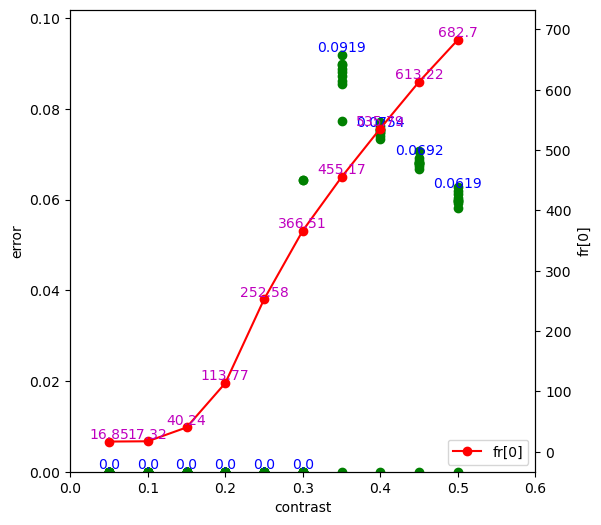

In [148]:
plot_contrast(error,y2)

# normed-time

In [ ]:
error=[]
y2=[]
for i in range(10):
    dir='/home/zhaobenyan/dataset/output/grating_32x32/contrast{}'.format(i+1)
    fr_norm,error_norm=read_norm(dir)
    error.append(error_norm)
    y2.append(fr_norm[0])
error=np.array(error).T
print(error)

In [150]:
#读取重复十次之后的数据
def read_output(file_name):
    with np.load(file_name) as f:
        fr=f['fr']
    return fr
    

In [163]:
Norm=None
error=[]
y2=[]
dir='/home/zhaobenyan/dataset/output/draftgrating_32x32/contrast6'
for i in range(1,6):
    fr=read_output(dir+'/fr_time{}.npz'.format(i))  #长为10的列表，第i项为第i次重复的fr向量（3840，1）
    fr_vector=np.array(fr).reshape(10, -1)  #reshape为（10，3840）
    fr_norm=np.linalg.norm(fr, ord=Norm, axis=1)   #fr的二范数（10，1）
    error_vector=fr_vector-fr_vector[0]        #error=第i次重复的数据减去第一次的,(10,3840)
    error_norm=np.linalg.norm(error_vector, ord=Norm, axis=1)/fr_norm[0] #error的二范数(除以第一项的二范数）（10，1）第一项必定是0
    error.append(error_norm)
    y2.append(fr_norm[0])
error=np.array(error).T
print(error[4])
print(y2)

[0.05126561 0.03940077 0.03218634 0.0288284  0.02551943]
[773.6388046110407, 768.0398752669031, 769.5827874028022, 769.3195857379428, 772.9050135689378]


In [161]:
def plot_time(error,y2):
    x=[1,2,3,4,5]  #横坐标：时间
    plt.figure(figsize=(8, 8))
    ax1 = plt.subplot(111)
    for i in range(10):
        plt.scatter(x, error[i])#,label="{}".format(i+1))
        #ax1.legend(loc=i)
        if i==2:
                for a, b in zip(x, np.around(error[i],4)):  # 添加这个循坏显示坐标
                    plt.text(a, b, b, color = "b",ha='center', va='bottom', fontsize=10)
    plt.xlim((0,5.5))
    plt.ylim((0,np.max(error)+0.005))
    ax1.set_ylabel('error');
    ax1.set_xlabel('time/s')
    
    ax2 = ax1.twinx() 
    ax2.plot(x, y2, 'r'+'o-',label = "norm2(fr) for the 0th time")
    ax2.legend(loc=4)
    plt.ylim((np.min(y2)-2),np.max(y2)+2)
    ax2.set_ylabel('norm2(fr) for the 0th time')
    for a, b in zip(x, np.around(y2,2)):  
        plt.text(a, b, b,color = "m", ha='center', va='bottom', fontsize=10)

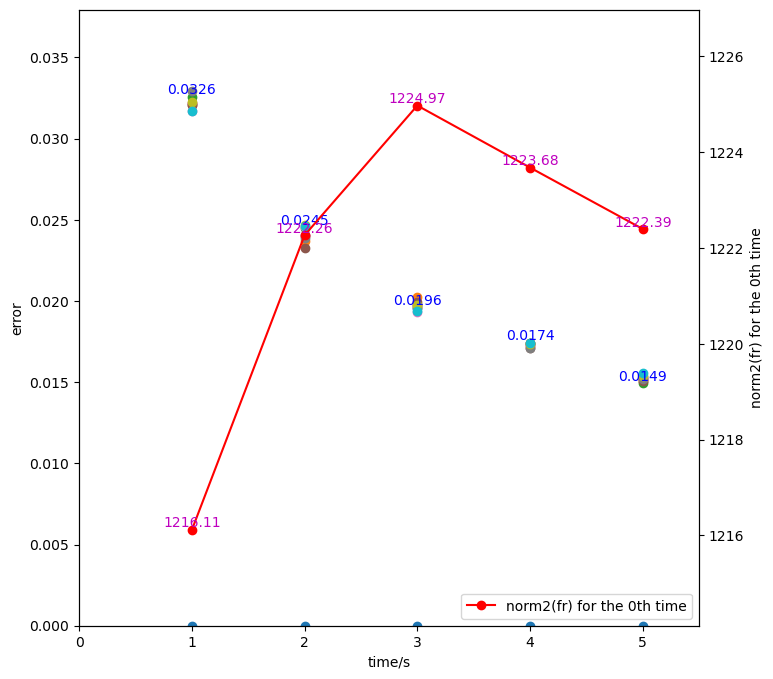

In [162]:
plot_time(error,y2)

# normed-repeat

In [6]:
def read_output(file_name):
    with np.load(file_name) as f:
        fr=f['fr']
    return fr

In [94]:
def compute_norm(dir,Norm=None):
    '''
    计算fr及误差的范数，默认为二范数
    dir:grating重复十次的数据所在地址
    Norm:用什么范数，默认为None(二范数)
    1:1范数，2：2范数，np.inf：无穷范数
    '''
    fr=read_output(dir+'/fr_time1.npz')  #长为10的列表，第i项为第i次重复的fr向量（3840，1）
    fr_vector=np.array(fr).reshape(10, -1)  #reshape为（10，3840）
    fr_norm=np.linalg.norm(fr,axis=1)   #fr的二范数（10，1）
    error=fr_vector-fr_vector[0]        #error=第i次重复的数据减去第一次的,(10,3840)
    error_norm=np.linalg.norm(error,axis=1)/fr_norm[0] #error的二范数(除以第一项的二范数）（10，1）第一项必定是0
    #return fr_norm,error_norm
    np.savez(dir+'/output_norm',fr_norm=fr_norm,error_norm=error_norm)#储存数据


In [97]:
#读取norm文件
def read_norm(dir):
    with np.load(dir+'/output_norm.npz') as f:
        fr_norm=f['fr_norm']
        error_norm=f['error_norm']
    return fr_norm,error_norm

In [98]:
dir='/home/zhaobenyan/dataset/output/draftgrating_32x32/contrast10'         
compute_norm(dir)
fr_norm,error_norm=read_norm(dir)
print(fr_norm,error_norm)

[1216.11389269 1217.24237521 1216.70333278 1218.04802861 1216.95193003
 1216.94042582 1216.94823226 1216.84879915 1217.1700785  1217.00493015] [0.         0.03207991 0.03256108 0.0321641  0.03213256 0.03204827
 0.0316769  0.03293275 0.03224808 0.03169824]


# max_min

In [25]:

#读取数据n_pic:图片数量 repeat：重复次数 重复次数 dir:读取数据的目录，time:实验时间
def read_data(n_pic,repeat,dir,time):
    fr=[]
    for k in range(n_pic):
        for i in range(repeat):
            fr_vector=read_output(dir+'contrast{}/fr_time{}.npz'.format(k+1,time))
            fr.append(fr_vector[i])
    return fr
    
#计算数据 储存为一个列表，长度为n_pin,列表的每一项为一个（3,3840）的array，分别储存每张图片的fr的mean、max、min（按mean升序排列）
def compute_data(n_pic,repeat,fr_vector):
    fr = np.array(fr_vector).reshape(n_pic, repeat, -1)
    fr_mean = np.mean(fr,axis=1)
    fr_max = np.max(fr,axis=1)
    fr_min = np.min(fr,axis=1)
    sorted_data_list=[]
    for i in range(n_pic):
        zip_mean_max_min=zip(fr_mean[i],fr_max[i],fr_min[i])
        sorted_zip = sorted(zip_mean_max_min, key=lambda x:x[0])
        sorted_data_list.append(sorted_zip)
    return  sorted_data_list

#画图
def plot_max_min(n_pic,sorted_data,dir_output):
    fig = plt.figure(figsize=(50,20),dpi=200)
    for i in range(n_pic):
        sorted_mean, sorted_max,sorted_min = zip(*sorted_data[i])
        ax = fig.add_subplot(2,5,i+1)
        plt.plot(np.arange(3840),sorted_mean,linewidth=0.3)
        plt.fill_between(np.arange(3840),sorted_max,sorted_min, color='r', alpha=.8, linewidth=0)
        plt.xlim([0,4000])
        plt.ylim([0,60])
        plt.title('contrast={}'.format((i+1)/2))
    plt.savefig(os.path.join(dir_output, 'repeat_time1.png'))#第一个是指存储路径，第二个是图片名字
    plt.close()


In [26]:
n_pic=10      #图片个数
repeat=10    #重复次数
dir='/home/zhaobenyan/dataset/output/grating_32x32/'    #需要读取的数据所在路径
dir_output='/home/zhaobenyan/dataset/output/grating_32x32'   #储存输出图片的路径
fr_vector=read_data(n_pic,repeat,dir,1)
sorted_data_list=compute_data(n_pic,repeat,fr_vector)
plot_max_min(n_pic,sorted_data_list,dir_output)

# imagenet32

In [4]:
def read_npz():
    with np.load('/home/zhaobenyan/robustness/datas/imagenet32.npz') as f:
        labels=f['labels']
        data=f['data']
    return  labels,data

In [67]:
### 获取Imagenet标签
import json
with open("/home/zhaobenyan/robustness/datas/imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i, x in json.load(f).items()}

#判断路径是否存在，不存在则创建
def path_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [78]:
def show_image(dir):
    labels,data=read_npz()
    for i in range(1,11):#第10、20...100张图
        label=labels[10*i]
        image=data[10*i]
        image =image.reshape(3,32,32)
        image = image.transpose(1,2,0)
        #plt.title(imagenet_classes[label-1])
        dir_image=dir+'/image{}'.format(i)
        path_exist(dir_image)
        plt.imshow(image)
        plt.savefig(os.path.join(dir_image, 'image{}'.format(i)))
        plt.close()

In [79]:
show_image('/home/zhaobenyan/dataset/output/imagenet32')

In [57]:
labels,data=read_npz()
print(labels[20])
#print(data[0]/256)
image=data[20]
images =image.reshape(3,32,32)
images = images.transpose(1,2,0)
print(images.shape)


407
(32, 32, 3)


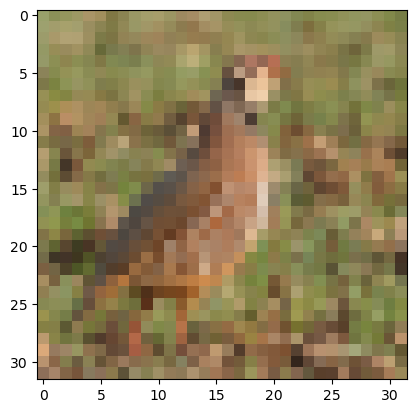

In [58]:
plt.imshow(images)
plt.savefig(os.path.join('/home/zhaobenyan/dataset/output/imagenet32', 'repeat_time1.png'))#第一个是指存储路径，第二个是图片名字


In [7]:
data=np.load('/home/zhaobenyan/robustness/datas/val_data.npz')
print(data.files)

['labels', 'data']


In [2]:
from ourmodel_image import ourmodel 

In [38]:
labels,data=read_npz()
image=data[2000]/256
print(image.shape)
#image[32*32*2:]=0.5
#print(image)

(3072,)


In [30]:
print(32*32)

1024


In [39]:
fr=ourmodel(image)

imgsize: 32
repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied
15.756402969360352


In [40]:
print(np.count_nonzero(fr==0))
print(fr)

3236
[0.  0.8 0.  0.2 0.  0.  0.  0.4 0.6 0.2 0.  0.4 0.  0.  0.  0.2 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.4 0.6 0.  0.  0.  0.  0.
 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.4 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.2 0.4 0.  0.  0.  0.  0.  0.  0.4 0.2 0.  0.
 0.  0.8 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.  0.2 0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.